In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split 


Relevant website:
https://www.kaggle.com/datasets/ylchang/telco-customer-churn-1113

In [ ]:
## Load data

In [2]:
data = pd.read_csv('/Users/hansangjun/Desktop/Springboard/Capstone2/telco_datafile3.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 61 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Count                              7043 non-null   int64  
 2   Country                            7043 non-null   object 
 3   State                              7043 non-null   object 
 4   City                               7043 non-null   object 
 5   Zip Code                           7043 non-null   int64  
 6   Lat Long                           7043 non-null   object 
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Gender                             7043 non-null   object 
 10  Senior Citizen                     7043 non-null   object 
 11  Partner                            7043 non-null   objec

In [5]:
## 
data = data.drop(columns=['Count', 'Lat Long', 'Latitude', 'Longitude', 'Count.1', 'Count.2', 'ID', 'Country', 'State', 'Customer ID', 'Churn Value', 'Churn Reason', 'Churn Category'])
data['Zip Code'] = data['Zip Code'].astype(object)


KeyError: "['Count', 'Lat Long', 'Latitude', 'Longitude', 'Count.1', 'Count.2', 'ID', 'Country', 'State', 'Customer ID', 'Churn Value', 'Churn Reason', 'Churn Category'] not found in axis"

In [6]:
# put yes as 1 and no as 0. and change the y type to int.    
data['Churn Label'].replace("Yes", 1, inplace=True)
data['Churn Label'].replace("No", 0, inplace=True)
print(data['Churn Label'])

0       1
1       0
2       0
3       0
4       0
       ..
7038    0
7039    0
7040    0
7041    0
7042    0
Name: Churn Label, Length: 7043, dtype: int64


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 48 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   City                               7043 non-null   object 
 1   Zip Code                           7043 non-null   object 
 2   Gender                             7043 non-null   object 
 3   Senior Citizen                     7043 non-null   object 
 4   Partner                            7043 non-null   object 
 5   Dependents                         7043 non-null   object 
 6   Tenure Months                      7043 non-null   int64  
 7   Phone Service                      7043 non-null   object 
 8   Multiple Lines                     7043 non-null   object 
 9   Internet Service                   7043 non-null   object 
 10  Online Security                    7043 non-null   object 
 11  Online Backup                      7043 non-null   objec

In [8]:
data.to_pickle('/Users/hansangjun/Desktop/Springboard/Capstone2/telco_data/fulldata.pkl')

In [ ]:
## explore data

No     5174
Yes    1869
Name: Churn Label, dtype: int64


Text(0.5, 1.0, 'Count Churn')

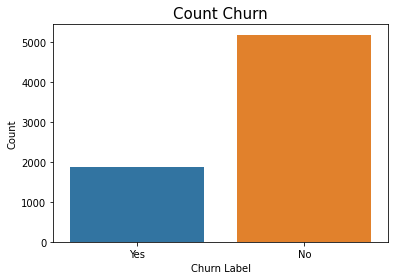

In [6]:
# Column 'Churn Label' will be out dependent variable.
print(data['Churn Label'].value_counts())
p = sns.countplot(x="Churn Label",
                data=data)

p.set_xlabel("Churn Label", fontsize = 10)
p.set_ylabel("Count", fontsize = 10)
p.set_title("Count Churn", fontsize = 15)

In [7]:
# percentage of yes and no
len_no = len(data[data['Churn Label'] == 'No'])
len_yes = len(data[data['Churn Label'] == 'Yes'])

percentage_no = (len_no / (len_no + len_yes)) * 100
percentage_yes = 100 - percentage_no

print (f"Percentage of the customer remained with the company is {percentage_no}.")
print (f"Percentage of the customer left the company this quarter is {percentage_yes}.")

Percentage of the customer remained with the company is 73.4630129206304.
Percentage of the customer left the company this quarter is 26.536987079369595.


In [8]:
## Mean group by 'Churn Label'
data.groupby('Churn Label').mean()

,Tenure Months,Monthly Charges,Total Charges,Churn Score,CLTV,Satisfaction Score,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Age,Number of Dependents,Population
Churn Label,,,,,,,,,,,,,,,,,,
No,37.569965,61.265124,2549.911442,50.098183,4490.921337,3.789911,2.468690,37.591225,22.883572,19.915733,61.265124,2.122279,6.752996,862.952107,3418.374927,45.344414,0.595284,21190.675686
Yes,17.979133,74.441332,1531.796094,82.510433,4149.414660,1.736223,0.521134,17.979133,23.167635,22.175495,74.441332,1.518983,7.158909,433.917549,1971.353569,49.735688,0.118245,21156.434992


In [9]:
## Here are more categorical variables
data.select_dtypes(include=[np.object])

,City,Zip Code,Gender,Senior Citizen,Partner,Dependents,Phone Service,Multiple Lines,Internet Service,Online Security,...,Churn Category,Referred a Friend,Offer,Internet Type,Device Protection Plan,Premium Tech Support,Streaming Music,Unlimited Data,Under 30,Married
0,Los Angeles,90003,Male,No,No,No,Yes,No,DSL,Yes,...,Competitor,No,None,DSL,No,No,No,Yes,No,No
1,Los Angeles,90003,Male,No,Yes,No,Yes,No,No,No internet service,...,NaN,Yes,None,None,No,No,No,No,Yes,Yes
2,Los Angeles,90003,Female,No,Yes,Yes,Yes,No,Fiber optic,No,...,NaN,Yes,None,Fiber Optic,No,Yes,No,Yes,No,Yes
3,Los Angeles,90003,Female,No,Yes,No,Yes,Yes,Fiber optic,Yes,...,NaN,Yes,Offer B,Fiber Optic,No,No,No,Yes,No,Yes
4,Los Angeles,90003,Male,No,No,No,Yes,No,Fiber optic,No,...,NaN,No,None,Fiber Optic,No,No,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Tulelake,96134,Male,No,No,No,Yes,Yes,DSL,Yes,...,NaN,No,None,DSL,Yes,Yes,No,No,Yes,No
7039,Olympic Valley,96146,Male,Yes,Yes,Yes,Yes,Yes,Fiber optic,Yes,...,NaN,Yes,None,Fiber Optic,No,No,No,Yes,No,Yes
7040,Olympic Valley,96146,Female,No,Yes,Yes,Yes,No,No,No internet service,...,NaN,Yes,None,None,No,No,No,No,Yes,Yes
7041,Olympic Valley,96146,Male,No,No,No,Yes,No,Fiber optic,Yes,...,NaN,No,Offer E,Fiber Optic,No,No,Yes,No,No,No


In [10]:
## Here are some more mean for other categorical value
data.groupby('Gender').mean()

,Tenure Months,Monthly Charges,Total Charges,Churn Score,CLTV,Satisfaction Score,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Age,Number of Dependents,Population
Gender,,,,,,,,,,,,,,,,,,
Female,32.244553,65.204243,2279.918062,58.692661,4408.477638,3.249713,1.979358,32.258888,22.800981,20.805333,65.204243,1.924490,6.909404,739.619384,3025.333139,46.472764,0.463016,20823.956995
Male,32.495359,64.327482,2279.554008,58.706048,4392.268073,3.240225,1.924895,32.512236,23.113949,20.230942,64.327482,1.999165,6.812940,758.400475,3043.254487,46.545992,0.474262,21532.481294


In [11]:
data.groupby('Senior Citizen').mean()

,Tenure Months,Monthly Charges,Total Charges,Churn Score,CLTV,Satisfaction Score,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Age,Number of Dependents,Population
Senior Citizen,,,,,,,,,,,,,,,,,,
No,32.192171,61.847441,2177.023801,57.731910,4401.943908,3.306558,1.986951,32.210812,22.963799,21.430436,61.847441,1.862884,6.497204,745.175919,2927.606204,41.488222,0.539908,21361.085409
Yes,33.295972,79.820359,2810.465193,63.698774,4391.779335,2.926445,1.770578,33.295972,22.933914,15.787215,79.820359,2.475280,8.739054,769.372154,3586.101121,72.457093,0.100701,20254.087566


In [12]:
data.groupby('Under 30').mean()

,Tenure Months,Monthly Charges,Total Charges,Churn Score,CLTV,Satisfaction Score,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Age,Number of Dependents,Population
Under 30,,,,,,,,,,,,,,,,,,
No,32.378235,65.428385,2295.806336,59.194612,4405.225806,3.219780,1.916873,32.390642,22.886902,15.198334,65.428385,2.009812,6.706842,749.822231,3050.886930,52.123892,0.451258,20825.893655
Yes,32.342612,62.076838,2215.010243,56.705211,4380.441827,3.346181,2.092791,32.371163,23.249115,41.927909,62.076838,1.770371,7.480371,746.187773,2967.899807,23.900785,0.538901,22614.019272


In [13]:
data.groupby('Married').mean()

,Tenure Months,Monthly Charges,Total Charges,Churn Score,CLTV,Satisfaction Score,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Age,Number of Dependents,Population
Married,,,,,,,,,,,,,,,,,,
No,23.357869,61.945001,1584.089810,61.009063,4242.656138,3.154628,0.000000,23.363362,22.806432,19.395496,61.945001,1.655567,6.426806,532.868679,2121.955353,46.569074,0.166987,21084.752266
Yes,42.017637,67.776264,3024.249765,56.227513,4569.009994,3.341564,4.040858,42.044092,23.122190,21.713992,67.776264,2.290338,7.325103,980.520647,4010.903072,46.446208,0.791593,21285.229277


In [14]:
data.groupby('Phone Service').mean()

,Tenure Months,Monthly Charges,Total Charges,Churn Score,CLTV,Satisfaction Score,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Age,Number of Dependents,Population
Phone Service,,,,,,,,,,,,,,,,,,
No,31.737537,42.028592,1496.033651,57.112903,4317.146628,3.195015,1.860704,31.766862,0.000000,26.922287,42.028592,1.809399,9.208211,0.000000,1505.024839,46.000000,0.498534,21034.561584
Yes,32.439082,67.199041,2363.759432,58.869517,4409.210659,3.250275,1.961641,32.453231,25.420517,19.828486,67.199041,1.978563,6.609024,829.414573,3198.350063,46.564377,0.465493,21197.352932


In [15]:
data.groupby('Offer').mean()

,Tenure Months,Monthly Charges,Total Charges,Churn Score,CLTV,Satisfaction Score,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Age,Number of Dependents,Population
Offer,,,,,,,,,,,,,,,,,,
None,31.545525,64.355791,2195.721769,58.812226,4361.643539,3.237555,1.909724,31.566159,22.777975,20.074800,64.355791,2.163879,6.881609,725.524658,2926.847702,47.063709,0.464019,21295.956152
Offer A,70.000000,77.719519,5446.134327,50.975000,5208.678846,3.546154,3.559615,70.000000,22.528923,23.298077,77.719519,2.008231,9.326923,1575.816538,7029.269558,45.442308,0.588462,22358.486538
Offer B,53.358010,70.829976,3794.044782,54.992718,4839.135922,3.478155,2.768204,53.358010,23.932512,21.547330,70.829976,2.068374,8.106796,1282.340061,5082.423265,45.376214,0.527913,19360.251214
Offer C,30.761446,66.578313,2053.522771,58.465060,4048.038554,3.315663,1.862651,30.761446,22.648313,22.284337,66.578313,2.307277,8.481928,699.548048,2759.245470,48.219277,0.520482,22503.633735
Offer D,15.951827,58.168937,931.036794,58.546512,4025.971761,3.245847,1.403654,15.951827,23.572326,18.498339,58.168937,1.788156,7.890365,378.587309,1315.726312,45.157807,0.523256,20668.375415
Offer E,3.667081,56.128509,214.132360,67.175155,4076.595031,2.809938,0.736646,3.704348,22.813267,20.380124,56.128509,0.804571,2.285714,85.406447,302.424969,45.821118,0.285714,21437.119255


Text(0, 0.5, 'Frequency of Churn')

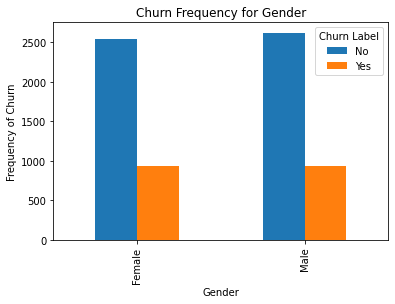

In [16]:
## Visualization
pd.crosstab(data['Gender'], data['Churn Label']).plot(kind='bar')
plt.title('Churn Frequency for Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency of Churn')

Not a good predictor

Text(0, 0.5, 'Frequency of Churn')

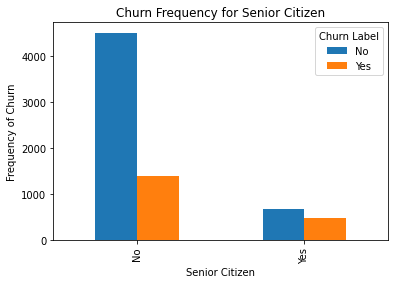

In [17]:
## Visualization
pd.crosstab(data['Senior Citizen'], data['Churn Label']).plot(kind='bar')
plt.title('Churn Frequency for Senior Citizen')
plt.xlabel('Senior Citizen')
plt.ylabel('Frequency of Churn')


This is a good predictor.

Text(0, 0.5, 'Frequency of Churn')

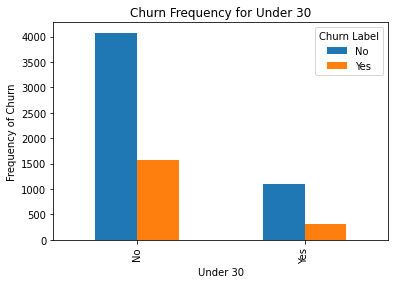

In [18]:
## Visualization
pd.crosstab(data['Under 30'], data['Churn Label']).plot(kind='bar')
plt.title('Churn Frequency for Under 30')
plt.xlabel('Under 30')
plt.ylabel('Frequency of Churn')


'Under 30' might be a good predictor.

Text(0, 0.5, 'Frequency of Churn')

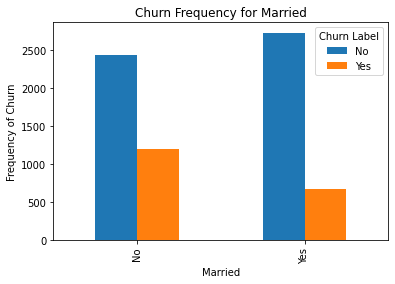

In [19]:
## Visualization
pd.crosstab(data['Married'], data['Churn Label']).plot(kind='bar')
plt.title('Churn Frequency for Married')
plt.xlabel('Married')
plt.ylabel('Frequency of Churn')


'Married' might be a good predictor.

Text(0, 0.5, 'Frequency of Churn')

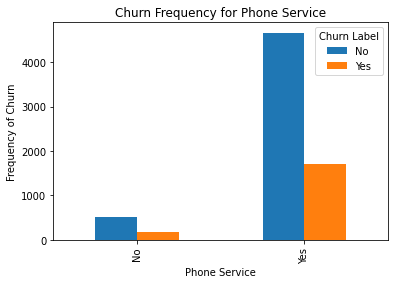

In [20]:
## Visualization
pd.crosstab(data['Phone Service'], data['Churn Label']).plot(kind='bar')
plt.title('Churn Frequency for Phone Service')
plt.xlabel('Phone Service')
plt.ylabel('Frequency of Churn')


'Phone Service' is a good predictor.

Text(0, 0.5, 'Frequency of Churn')

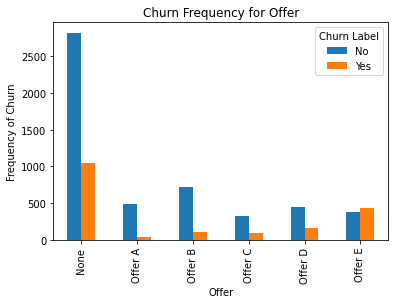

In [21]:
## Visualization
pd.crosstab(data['Offer'], data['Churn Label']).plot(kind='bar')
plt.title('Churn Frequency for Offer')
plt.xlabel('Offer')
plt.ylabel('Frequency of Churn')


Offer might be a good predictor.

Text(0, 0.5, 'Frequency of Churn')

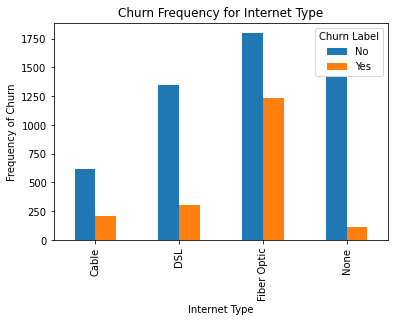

In [22]:
## Visualization
pd.crosstab(data['Internet Type'], data['Churn Label']).plot(kind='bar')
plt.title('Churn Frequency for Internet Type')
plt.xlabel('Internet Type')
plt.ylabel('Frequency of Churn')


Internet Type might be a good predictor.

In [7]:
## Create dummy variables
g = data.columns.to_series().groupby(data.dtypes).groups

cat_vars = []

for k, v in g.items():
    if k == object:
        for i in range(len(v)):
            cat_vars.append(v[i])

for var in cat_vars:
    cat_list = 'var' + '_' + var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
    
data_vars = data.columns.values.tolist()
to_keep = [i for i in data_vars if i not in cat_vars]


In [8]:
data_final = data[to_keep]
print(data_final.columns)

Index(['Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Label',
       'Churn Score', 'CLTV', 'Satisfaction Score', 'Number of Referrals',
       'Tenure in Months', 'Avg Monthly Long Distance Charges',
       ...
       'Premium Tech Support_No', 'Premium Tech Support_Yes',
       'Streaming Music_No', 'Streaming Music_Yes', 'Unlimited Data_No',
       'Unlimited Data_Yes', 'Under 30_No', 'Under 30_Yes', 'Married_No',
       'Married_Yes'],
      dtype='object', length=2896)


In [9]:
## Over sampling using SMOTE (Synthetic Minority Oversampling Technique)
X = data_final.loc[:, data_final.columns != 'Churn Label']
y = data_final.loc[:, data_final.columns == 'Churn Label']
y = y.astype('int')
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)
columns = X_train.columns



In [11]:
os_data_X, os_data_y = os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X, columns = columns)
os_data_y = pd.DataFrame(data=os_data_y, columns=['Churn Label'])

# Check the numbers of data
print("length of oversampled data is ", len(os_data_X))
print("number of no churn in oversampled data ", len(os_data_y[os_data_y['Churn Label']==0]))
print("number of yes churn ", len(os_data_y[os_data_y['Churn Label']==1]))
print("proportion of no churn data in oversampled data is ", len(os_data_y[os_data_y['Churn Label']==0])/len(os_data_X))
print("proportion of yes churn data in oversampled data is ", len(os_data_y[os_data_y['Churn Label']==1])/len(os_data_X))



length of oversampled data is  7232
number of no churn in oversampled data  3616
number of yes churn  3616
proportion of no churn data in oversampled data is  0.5
proportion of yes churn data in oversampled data is  0.5


Note: Now it's a perfect balanced data. It only over-sampled on the training data. None of the information in the test data is being used to create synthetic observations, therefore, no information will bleed from test data into the model training.

In [14]:
# Recursive feature elimination: 
# The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

data_final_vars = data_final.columns.values.tolist()
y = ['Churn Label']
X = [i for i in data_final_vars if i not in y]

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg, step = 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)



/Users/hansangjun/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/hansangjun/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/line

/Users/hansangjun/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/hansangjun/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/line

/Users/hansangjun/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/hansangjun/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/line

/Users/hansangjun/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/hansangjun/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/line

/Users/hansangjun/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/hansangjun/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/line

[ True  True  True ...  True  True  True]
[1 1 1 ... 1 1 1]


/Users/hansangjun/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
